In [73]:
#Import libraries

import pandas as pd
import numpy as np
from scipy import stats
from scipy import mean
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
#Import player data

players = pd.read_csv('..\Python Data\Seasons_Stats.csv')
players.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [3]:
#Import standings data

standings = pd.read_csv('..\Python Data\Team_Records.csv')
standings.head()

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
0,2017-18,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7)
1,2016-17,NBA,Boston Celtics*,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5)
2,2015-16,NBA,Boston Celtics*,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7)
3,2014-15,NBA,Boston Celtics*,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5)
4,2013-14,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1)


In [4]:
#Format Season data to match Year in players dataframe

standings.Season = standings.Season.str.slice(0,4).astype(int) + 1

In [5]:
#Limit players dataframe and standings dataframe to only 1982-2017 seasons

y82_players = players[(players.Year > 1982)].copy()
y82_standings = standings[(standings.Season > 1982)].copy()
y82_standings = y82_standings[(y82_standings.Season < 2018)]

In [6]:
y82_players.Tm.unique()

array(['LAL', 'PHO', 'DAL', 'BOS', 'DEN', 'TOT', 'PHI', 'UTA', 'SDC',
       'CLE', 'NJN', 'HOU', 'WSB', 'SAS', 'DET', 'CHI', 'IND', 'GSW',
       'MIL', 'SEA', 'ATL', 'POR', 'NYK', 'KCK', 'LAC', 'SAC', 'CHH',
       'MIA', 'ORL', 'MIN', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH', 'CHA',
       'NOK', 'OKC', 'BRK', 'NOP', 'CHO'], dtype=object)

In [7]:
#Define regular expressions for team name acronyms

acronyms = {'^Atlanta[ a-zA-Z*]+': 'ATL', '^Brooklyn[ a-zA-Z*]+': 'BRK', '^Boston[ a-zA-Z*]+': 'BOS', 
            '^Charlotte[ a-zA-Z*]+': 'CHA', '^Chicago[ a-zA-Z*]+': 'CHI', 
            '^Cleveland[ a-zA-Z*]+': 'CLE', '^Dallas[ a-zA-Z*]+': 'DAL', '^Denver[ a-zA-Z*]+': 'DEN', 
            '^Detroit[ a-zA-Z*]+': 'DET', '^Golden State[ a-zA-Z*]+': 'GSW', 
            '^Houston[ a-zA-Z*]+': 'HOU', '^Indiana[ a-zA-Z*]+': 'IND', '^Los Angeles C[ a-zA-Z*]+': 'LAC', 
            '^Los Angeles L[ a-zA-Z*]+': 'LAL', 
            '^Memphis[ a-zA-Z*]+': 'MEM', '^Miami[ a-zA-Z*]+': 'MIA', '^Milwaukee[ a-zA-Z*]+': 'MIL', 
            '^Minnesota[ a-zA-Z*]+': 'MIN', '^New Orleans[ a-zA-Z*/]+': 'NOP', 
            '^New York[ a-zA-Z*]+': 'NYK', '^Oklahoma City[ a-zA-Z*]+': 'OKC', '^Orlando[ a-zA-Z*]+': 'ORL', 
            '^Philadelphia[ a-zA-Z*0-9]+': 'PHI', 
            '^Phoenix[ a-zA-Z*]+': 'PHO', '^Portland[ a-zA-Z*]+': 'POR', '^Sacramento[ a-zA-Z*]+': 'SAC', 
            '^San Antonio[ a-zA-Z*]+': 'SAS', 
            '^Toronto[ a-zA-Z*]+': 'TOR', '^Utah[ a-zA-Z*]+': 'UTA', '^Washington[ a-zA-Z*]+': 'WAS',
            '^Vancouver[ a-zA-Z*]+': 'MEM', '^New Jersey[ a-zA-Z*]+': 'BRK', '^Seattle[ a-zA-Z*]+': 'OKC',
            '^San Diego[ a-zA-Z*]+': 'LAC', '^Kansas City[ a-zA-Z*]+': 'SAC'}

In [8]:
#Format Team data in standings dataframe to match Tm in players dataframe

y82_standings.Team.replace(acronyms, regex = True, inplace = True)

#Check that all Team names have been updated
y82_standings.Team.unique()

array(['BOS', 'TOR', 'NYK', 'PHI', 'BRK', 'MIN', 'OKC', 'DEN', 'POR',
       'UTA', 'CLE', 'DET', 'MIL', 'IND', 'CHI', 'GSW', 'LAC', 'PHO',
       'SAC', 'LAL', 'WAS', 'MIA', 'CHA', 'ORL', 'ATL', 'HOU', 'SAS',
       'NOP', 'DAL', 'MEM'], dtype=object)

In [9]:
#Select only relevant columns from players dataframe

y82_player_stats = y82_players[['Year', 'Player', 'Pos', 'Tm', 'G', 'GS', 'MP', 'OBPM', 'DBPM', 'OWS', 'DWS']].copy()
y82_player_stats.tail()

,Year,Player,Pos,Tm,G,GS,MP,OBPM,DBPM,OWS,DWS
24686,2017.0,Cody Zeller,PF,CHO,62.0,58.0,1725.0,-0.2,2.3,3.4,2.2
24687,2017.0,Tyler Zeller,C,BOS,51.0,5.0,525.0,-3.2,0.8,0.5,0.6
24688,2017.0,Stephen Zimmerman,C,ORL,19.0,0.0,108.0,-7.8,0.4,-0.1,0.1
24689,2017.0,Paul Zipser,SF,CHI,44.0,18.0,843.0,-3.6,-0.1,-0.3,0.8
24690,2017.0,Ivica Zubac,C,LAL,38.0,11.0,609.0,-2.7,0.3,0.6,0.5


In [10]:
#Correct Tm data in players dataframe to combine acronym changes due to team moves (e.g. New Jersey Nets -> Brooklyn Nets)

y82_player_stats.Tm.replace({'NOH': 'NOP', 'CHO': 'CHA', 'SDC': 'LAC', 'NJN': 'BRK',
                            'WSB': 'WAS', 'SEA': 'OKC', 'KCK': 'SAC', 'VAN': 'MEM',
                             'NOK': 'NOP', 'CHH': 'CHA'}, inplace=True)

#Check that all team names have been properly updated
y82_player_stats.Tm.unique()

array(['LAL', 'PHO', 'DAL', 'BOS', 'DEN', 'TOT', 'PHI', 'UTA', 'LAC',
       'CLE', 'BRK', 'HOU', 'WAS', 'SAS', 'DET', 'CHI', 'IND', 'GSW',
       'MIL', 'OKC', 'ATL', 'POR', 'NYK', 'SAC', 'CHA', 'MIA', 'ORL',
       'MIN', 'MEM', 'TOR', 'NOP'], dtype=object)

In [11]:
#1999 season shortened to 50 games due to lockout; recalculate G and GS as corresponding total for an 82 game season
#2012 season shortened to 66 games due to lockout; recalculate G and GS as corresponding total for an 82 game season

y82_player_stats.loc[(y82_player_stats.Year == 1999), 'G'] = y82_player_stats[(y82_player_stats.Year == 1999)]['G']*82/50
y82_player_stats.loc[(y82_player_stats.Year == 1999), 'GS'] = y82_player_stats[(y82_player_stats.Year == 1999)]['GS']*82/50


y82_player_stats.loc[(y82_player_stats.Year == 2012), 'G'] = y82_player_stats[(y82_player_stats.Year == 2012)]['G']*82/66
y82_player_stats.loc[(y82_player_stats.Year == 2012), 'GS'] = y82_player_stats[(y82_player_stats.Year == 2012)]['GS']*82/66

In [12]:
#Create %GS (percent of games started) category
#Create role category, 2 = starter (starts more than 50% of games played), 1 = key reserve (not starter, 
#plays at least 35% of games in the season, or 29 games in an 82 game season), 0 = bench player

y82_player_stats['%GS'] = y82_player_stats.GS/y82_player_stats.G
y82_player_stats['Role'] = 0

y82_player_stats.loc[y82_player_stats['G'] > 29, 'Role'] = 1
y82_player_stats.loc[y82_player_stats['%GS'] > 0.5, 'Role'] = 2

y82_player_stats.head()

,Year,Player,Pos,Tm,G,GS,MP,OBPM,DBPM,OWS,DWS,%GS,Role
6823,1983.0,Kareem Abdul-Jabbar*,C,LAL,79.0,79.0,2554.0,3.6,0.3,8.0,2.9,1.000000,2
6824,1983.0,Alvan Adams,C,PHO,80.0,75.0,2447.0,0.6,2.7,2.0,4.5,0.937500,2
6825,1983.0,Mark Aguirre,SF,DAL,81.0,75.0,2784.0,3.6,-2.0,5.9,1.0,0.925926,2
6826,1983.0,Danny Ainge,SG,BOS,80.0,76.0,2048.0,0.8,0.4,2.8,2.4,0.950000,2
6827,1983.0,Dwight Anderson,PG,DEN,5.0,0.0,33.0,-3.9,-5.1,0.0,0.0,0.000000,0


# **Hypothesis 1**

In [36]:
#Perform t-test for OBPM

stats.ttest_ind(y82_player_stats[(y82_player_stats.Role == 2)].OBPM, y82_player_stats[(y82_player_stats.Role == 1)].OBPM)

Ttest_indResult(statistic=54.42037849881375, pvalue=0.0)

In [37]:
#Perform t-test for DBPM

stats.ttest_ind(y82_player_stats[(y82_player_stats.Role == 2)].DBPM, y82_player_stats[(y82_player_stats.Role == 1)].DBPM)

Ttest_indResult(statistic=22.642248202410805, pvalue=2.0694042031426637e-111)

In [38]:
#Perform t-test for OWS

stats.ttest_ind(y82_player_stats[(y82_player_stats.Role == 2)].OWS, y82_player_stats[(y82_player_stats.Role == 1)].OWS)

Ttest_indResult(statistic=58.75155994809166, pvalue=0.0)

In [39]:
#Perform t-test for DWS

stats.ttest_ind(y82_player_stats[(y82_player_stats.Role == 2)].DWS, y82_player_stats[(y82_player_stats.Role == 1)].DWS)

Ttest_indResult(statistic=59.516326963536, pvalue=0.0)

In [46]:
#Calculate confidence interval for OBPM

n1_OBPM_1 = y82_player_stats[(y82_player_stats.Role == 2)].OBPM.shape[0]
avg1_OBPM_1 = y82_player_stats[(y82_player_stats.Role == 2)].OBPM.mean()
std1_OBPM_1 = y82_player_stats[(y82_player_stats.Role == 2)].OBPM.var()

n2_OBPM_1 = y82_player_stats[(y82_player_stats.Role == 1)].OBPM.shape[0]
avg2_OBPM_1 = y82_player_stats[(y82_player_stats.Role == 1)].OBPM.mean()
std2_OBPM_1 = y82_player_stats[(y82_player_stats.Role == 1)].OBPM.var()

upper_OBPM_1 = (avg1_OBPM_1 - avg2_OBPM_1) + 1.96*math.sqrt(std1_OBPM_1/n1_OBPM_1 + std2_OBPM_1/n2_OBPM_1)
lower_OBPM_1 = (avg1_OBPM_1 - avg2_OBPM_1) - 1.96*math.sqrt(std1_OBPM_1/n1_OBPM_1 + std2_OBPM_1/n2_OBPM_1)

print(lower_OBPM_1, upper_OBPM_1)

2.074373935153738 2.231292043046441


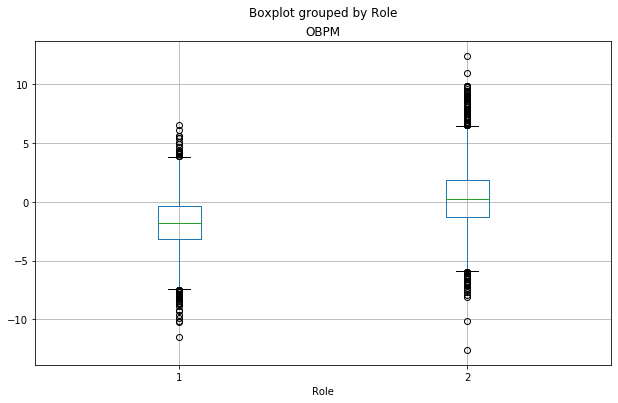

In [102]:
y82_player_stats[(y82_player_stats.Role != 0)].boxplot('OBPM', by='Role', figsize=(10, 6))

In [48]:
#Calculate confidence interval for DBPM

n1_DBPM_1 = y82_player_stats[(y82_player_stats.Role == 2)].DBPM.shape[0]
avg1_DBPM_1 = y82_player_stats[(y82_player_stats.Role == 2)].DBPM.mean()
std1_DBPM_1 = y82_player_stats[(y82_player_stats.Role == 2)].DBPM.var()

n2_DBPM_1 = y82_player_stats[(y82_player_stats.Role == 1)].DBPM.shape[0]
avg2_DBPM_1 = y82_player_stats[(y82_player_stats.Role == 1)].DBPM.mean()
std2_DBPM_1 = y82_player_stats[(y82_player_stats.Role == 1)].DBPM.var()

upper_DBPM_1 = (avg1_DBPM_1 - avg2_DBPM_1) + 1.96*math.sqrt(std1_DBPM_1/n1_DBPM_1 + std2_DBPM_1/n2_DBPM_1)
lower_DBPM_1 = (avg1_DBPM_1 - avg2_DBPM_1) - 1.96*math.sqrt(std1_DBPM_1/n1_DBPM_1 + std2_DBPM_1/n2_DBPM_1)

print(lower_DBPM_1, upper_DBPM_1)

0.6045395229623934 0.7196525953935095


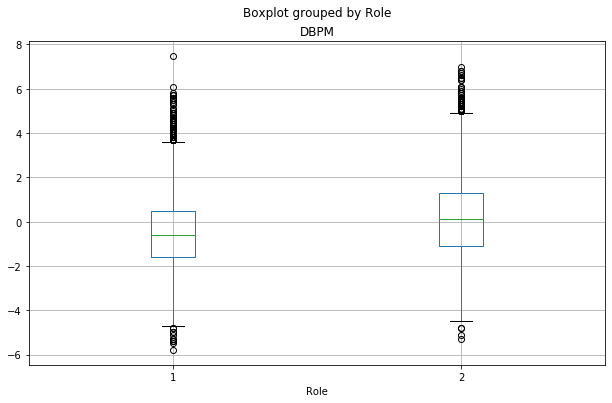

In [103]:
y82_player_stats[(y82_player_stats.Role != 0)].boxplot('DBPM', by='Role', figsize=(10, 6))

In [47]:
#Calculate confidence interval for OWS

n1_OWS_1 = y82_player_stats[(y82_player_stats.Role == 2)].OWS.shape[0]
avg1_OWS_1 = y82_player_stats[(y82_player_stats.Role == 2)].OWS.mean()
std1_OWS_1 = y82_player_stats[(y82_player_stats.Role == 2)].OWS.var()

n2_OWS_1 = y82_player_stats[(y82_player_stats.Role == 1)].OWS.shape[0]
avg2_OWS_1 = y82_player_stats[(y82_player_stats.Role == 1)].OWS.mean()
std2_OWS_1 = y82_player_stats[(y82_player_stats.Role == 1)].OWS.var()

upper_OWS_1 = (avg1_OWS_1 - avg2_OWS_1) + 1.96*math.sqrt(std1_OWS_1/n1_OWS_1 + std2_OWS_1/n2_OWS_1)
lower_OWS_1 = (avg1_OWS_1 - avg2_OWS_1) - 1.96*math.sqrt(std1_OWS_1/n1_OWS_1 + std2_OWS_1/n2_OWS_1)

print(lower_OWS_1, upper_OWS_1)

1.917342383571724 2.0568446572683334


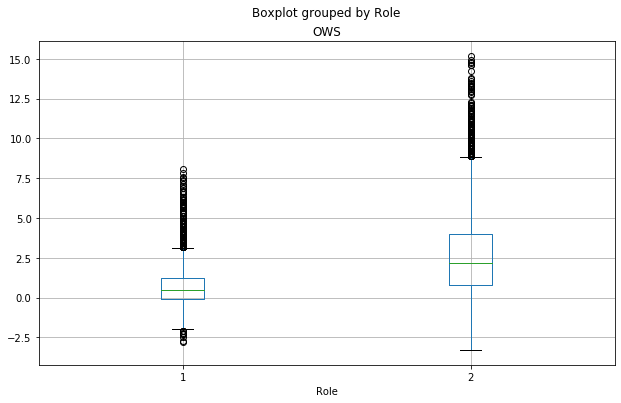

In [104]:
y82_player_stats[(y82_player_stats.Role != 0)].boxplot('OWS', by='Role', figsize=(10, 6))

In [45]:
#Calculate confidence interval for DWS

n1_DWS_1 = y82_player_stats[(y82_player_stats.Role == 2)].DWS.shape[0]
avg1_DWS_1 = y82_player_stats[(y82_player_stats.Role == 2)].DWS.mean()
std1_DWS_1 = y82_player_stats[(y82_player_stats.Role == 2)].DWS.var()

n2_DWS_1 = y82_player_stats[(y82_player_stats.Role == 1)].DWS.shape[0]
avg2_DWS_1 = y82_player_stats[(y82_player_stats.Role == 1)].DWS.mean()
std2_DWS_1 = y82_player_stats[(y82_player_stats.Role == 1)].DWS.var()

upper_DWS_1 = (avg1_DWS_1 - avg2_DWS_1) + 1.96*math.sqrt(std1_DWS_1/n1_DWS_1 + std2_DWS_1/n2_DWS_1)
lower_DWS_1 = (avg1_DWS_1 - avg2_DWS_1) - 1.96*math.sqrt(std1_DWS_1/n1_DWS_1 + std2_DWS_1/n2_DWS_1)

print(lower_DWS_1, upper_DWS_1)

1.0727300036907017 1.1491289508840967


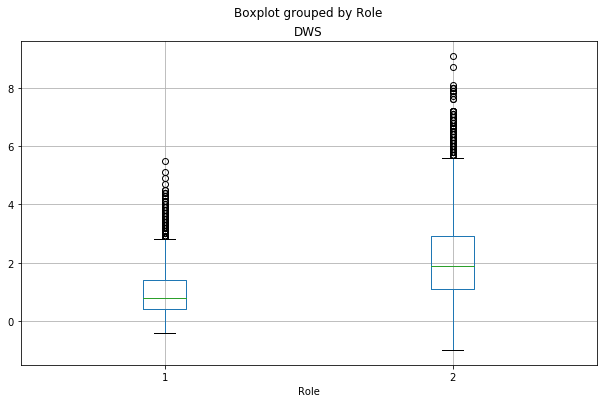

In [105]:
y82_player_stats[(y82_player_stats.Role != 0)].boxplot('DWS', by='Role', figsize=(10, 6))

## **Hypothesis 1 Results**

There is a statistically significant difference between the differences in OBPM, DBPM, OWS, and DWS between starters and reserves. We reject the null hypothesis with p-values of <0.001 for all 4 statistical categories. Starters had a higher score for all 4 statistical categories, with larger differences in the offensive statistics than defensive statistics. We can therefore conclude that starters are significantly better than reserves on both offense and defense. The differences between starters and reserves for all 4 statistical categories is therefore worth examining further in hypotheses 2 and 3.

# **Hypothesis 2**

In [13]:
#Format Year data in players dataframe to match standings dataframe

y82_player_stats.Year = y82_player_stats.Year.astype(int)
y82_player_stats.head()

,Year,Player,Pos,Tm,G,GS,MP,OBPM,DBPM,OWS,DWS,%GS,Role
6823,1983,Kareem Abdul-Jabbar*,C,LAL,79.0,79.0,2554.0,3.6,0.3,8.0,2.9,1.000000,2
6824,1983,Alvan Adams,C,PHO,80.0,75.0,2447.0,0.6,2.7,2.0,4.5,0.937500,2
6825,1983,Mark Aguirre,SF,DAL,81.0,75.0,2784.0,3.6,-2.0,5.9,1.0,0.925926,2
6826,1983,Danny Ainge,SG,BOS,80.0,76.0,2048.0,0.8,0.4,2.8,2.4,0.950000,2
6827,1983,Dwight Anderson,PG,DEN,5.0,0.0,33.0,-3.9,-5.1,0.0,0.0,0.000000,0


In [14]:
#Rename season and team columns to match column names in players dataframe


y82_standings.rename(columns = {'Season': 'Year', 'Team': 'Tm'}, inplace = True)

y82_standings.head()

,Year,Lg,Tm,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
1,2017,NBA,BOS,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5)
2,2016,NBA,BOS,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7)
3,2015,NBA,BOS,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5)
4,2014,NBA,BOS,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1)
5,2013,NBA,BOS,41,40,0.506,3,-0.62,91.7,-0.3,103.1,-2.8,103.3,-2.6,Lost E. Conf. 1st Rnd.,D. Rivers (41-40),P. Pierce (7.2)


In [15]:
#Convert Playoffs to categorical variable, 'Yes' or 'No'

y82_standings.Playoffs.loc[~y82_standings.Playoffs.isnull()] = 'Yes'
y82_standings.Playoffs.loc[y82_standings.Playoffs.isnull()] = 'No'

y82_standings.head()

C:\Users\nteut\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Year,Lg,Tm,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
1,2017,NBA,BOS,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Yes,B. Stevens (53-29),I. Thomas (12.5)
2,2016,NBA,BOS,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Yes,B. Stevens (48-34),I. Thomas (9.7)
3,2015,NBA,BOS,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Yes,B. Stevens (40-42),T. Zeller (6.5)
4,2014,NBA,BOS,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,No,B. Stevens (25-57),B. Bass (5.1)
5,2013,NBA,BOS,41,40,0.506,3,-0.62,91.7,-0.3,103.1,-2.8,103.3,-2.6,Yes,D. Rivers (41-40),P. Pierce (7.2)


In [16]:
#Define function to reformat Pos variable to remove joined positions (eg PG-SG -> PG)

def pos_edit(s):
    if '-' in s:
        return str(s.split('-')[0])
    else:
        return s

In [17]:
#Apply reformatting function and create POS_final column to use in analysis

y82_player_stats['POS_final'] = y82_player_stats.Pos.apply(lambda x: pos_edit(x))

In [18]:
#Combine player statistics and team standings into single table

player_w_standings = pd.merge(y82_player_stats, y82_standings[['Year', 'Tm', 'W/L%', 'Playoffs']], on = ['Year', 'Tm'])

In [19]:
#Calculate average collective statistics for each team each year

team_stats = player_w_standings.groupby(['Year', 'Tm', 'Playoffs'])['OBPM', 'DBPM', 'OWS', 'DWS'].mean().reset_index()
team_stats.head()

,Year,Tm,Playoffs,OBPM,DBPM,OWS,DWS
0,1983,ATL,Yes,-1.941176,-0.770588,0.835294,1.429412
1,1983,BOS,Yes,-1.207692,0.130769,1.984615,2.107692
2,1983,BRK,Yes,-2.158824,0.717647,0.800000,2.052941
3,1983,CHI,No,-1.733333,-0.926667,1.213333,0.846667
4,1983,CLE,No,-1.994444,-0.305556,0.461111,0.861111


In [20]:
#Add team average collective statistics to players dataframe

player_w_standings_final = pd.merge(player_w_standings, team_stats[['Year', 'Tm', 'OBPM', 'DBPM', 'OWS', 'DWS']], on = ['Year', 'Tm'])
player_w_standings_final.rename(columns = {'OBPM_y': 'Team_OBPM', 'DBPM_y': 'Team_DBPM', 'OWS_y': 'Team_OWS', 'DWS_y': 'Team_DWS',}, inplace = True)

In [21]:
player_w_standings_final.head()

,Year,Player,Pos,Tm,G,GS,MP,OBPM_x,DBPM_x,OWS_x,DWS_x,%GS,Role,POS_final,W/L%,Playoffs,Team_OBPM,Team_DBPM,Team_OWS,Team_DWS
0,1983,Kareem Abdul-Jabbar*,C,LAL,79.0,79.0,2554.0,3.6,0.3,8.0,2.9,1.000000,2,C,0.707,Yes,-1.98125,-1.36875,2.1375,1.2125
1,1983,Billy Ray,SG,LAL,4.0,0.0,27.0,-14.2,-6.6,-0.2,0.0,0.000000,0,SG,0.707,Yes,-1.98125,-1.36875,2.1375,1.2125
2,1983,Joe Cooper,C,LAL,2.0,0.0,11.0,-13.2,-0.1,-0.1,0.0,0.000000,0,C,0.707,Yes,-1.98125,-1.36875,2.1375,1.2125
3,1983,Michael Cooper,SG,LAL,82.0,3.0,2148.0,0.8,1.2,3.1,2.1,0.036585,1,SG,0.707,Yes,-1.98125,-1.36875,2.1375,1.2125
4,1983,Clay Johnson,SG,LAL,48.0,0.0,447.0,-1.7,-1.1,0.2,0.3,0.000000,1,SG,0.707,Yes,-1.98125,-1.36875,2.1375,1.2125


In [22]:
#Calculate OBPM, DBPM, OWS, DWS above team average for each player

player_w_standings_final['OBPM_Diff'] = player_w_standings_final.OBPM_x - player_w_standings_final.Team_OBPM
player_w_standings_final['DBPM_Diff'] = player_w_standings_final.DBPM_x - player_w_standings_final.Team_DBPM
player_w_standings_final['OWS_Diff'] = player_w_standings_final.OWS_x - player_w_standings_final.Team_OWS
player_w_standings_final['DWS_Diff'] = player_w_standings_final.DWS_x - player_w_standings_final.Team_DWS

In [23]:
player_w_standings_final.head()

,Year,Player,Pos,Tm,G,GS,MP,OBPM_x,DBPM_x,OWS_x,...,W/L%,Playoffs,Team_OBPM,Team_DBPM,Team_OWS,Team_DWS,OBPM_Diff,DBPM_Diff,OWS_Diff,DWS_Diff
0,1983,Kareem Abdul-Jabbar*,C,LAL,79.0,79.0,2554.0,3.6,0.3,8.0,...,0.707,Yes,-1.98125,-1.36875,2.1375,1.2125,5.58125,1.66875,5.8625,1.6875
1,1983,Billy Ray,SG,LAL,4.0,0.0,27.0,-14.2,-6.6,-0.2,...,0.707,Yes,-1.98125,-1.36875,2.1375,1.2125,-12.21875,-5.23125,-2.3375,-1.2125
2,1983,Joe Cooper,C,LAL,2.0,0.0,11.0,-13.2,-0.1,-0.1,...,0.707,Yes,-1.98125,-1.36875,2.1375,1.2125,-11.21875,1.26875,-2.2375,-1.2125
3,1983,Michael Cooper,SG,LAL,82.0,3.0,2148.0,0.8,1.2,3.1,...,0.707,Yes,-1.98125,-1.36875,2.1375,1.2125,2.78125,2.56875,0.9625,0.8875
4,1983,Clay Johnson,SG,LAL,48.0,0.0,447.0,-1.7,-1.1,0.2,...,0.707,Yes,-1.98125,-1.36875,2.1375,1.2125,0.28125,0.26875,-1.9375,-0.9125


In [24]:
#Create dataframe with collective statistics averaged by team grouped by role
#Eliminate bench players, remove null rows

team_stats_S = player_w_standings_final[(player_w_standings_final.Role == 2)].groupby(['Year', 'Tm', 'Playoffs', 'Role'])['OBPM_Diff', 'DBPM_Diff', 'OWS_Diff', 'DWS_Diff'].mean().reset_index()
team_stats_S.dropna(inplace = True)
team_stats_R = player_w_standings_final[(player_w_standings_final.Role == 1)].groupby(['Year', 'Tm', 'Playoffs', 'Role'])['OBPM_Diff', 'DBPM_Diff', 'OWS_Diff', 'DWS_Diff'].mean().reset_index()
team_stats_R.dropna(inplace = True)

team_stats_final = pd.merge(team_stats_S, team_stats_R, on = ['Year', 'Tm', 'Playoffs'])
team_stats_final.head()

,Year,Tm,Playoffs,Role_x,OBPM_Diff_x,DBPM_Diff_x,OWS_Diff_x,DWS_Diff_x,Role_y,OBPM_Diff_y,DBPM_Diff_y,OWS_Diff_y,DWS_Diff_y
0,1983,ATL,Yes,2,2.357843,1.187255,1.364706,1.353922,1,-0.758824,0.942017,-0.706723,-0.415126
1,1983,BOS,Yes,2,2.667692,1.129231,2.155385,1.352308,1,-0.763736,-0.316484,-1.227473,-0.664835
2,1983,BRK,Yes,2,1.558824,0.210924,0.785714,1.261345,1,-0.255462,0.210924,-0.428571,-0.424370
3,1983,CHI,No,2,1.950000,0.260000,1.270000,0.570000,1,0.133333,0.246667,-0.513333,-0.066667
4,1983,CLE,No,2,0.750000,-0.061111,0.383333,0.138889,1,-0.091270,0.348413,-0.346825,0.053175


In [25]:
#Calculate difference between average collective statistics for starters and reserves for each team

team_stats_final['OBPM_Diff'] = team_stats_final.OBPM_Diff_x - team_stats_final.OBPM_Diff_y
team_stats_final['DBPM_Diff'] = team_stats_final.DBPM_Diff_x - team_stats_final.DBPM_Diff_y
team_stats_final['OWS_Diff'] = team_stats_final.OWS_Diff_x - team_stats_final.OWS_Diff_y
team_stats_final['DWS_Diff'] = team_stats_final.DWS_Diff_x - team_stats_final.DWS_Diff_y

In [26]:
#Perform t-test for OBPM

stats.ttest_ind(team_stats_final[(team_stats_final.Playoffs == 'Yes')].OBPM_Diff, team_stats_final[(team_stats_final.Playoffs == 'No')].OBPM_Diff)

Ttest_indResult(statistic=10.56262661097012, pvalue=9.137570908148962e-25)

In [27]:
#Perform t-test for DBPM

stats.ttest_ind(team_stats_final[(team_stats_final.Playoffs == 'Yes')].DBPM_Diff, team_stats_final[(team_stats_final.Playoffs == 'No')].DBPM_Diff)

Ttest_indResult(statistic=6.909471650540706, pvalue=8.778110486223219e-12)

In [28]:
#Perform t-test for OWS

stats.ttest_ind(team_stats_final[(team_stats_final.Playoffs == 'Yes')].OWS_Diff, team_stats_final[(team_stats_final.Playoffs == 'No')].OWS_Diff)

Ttest_indResult(statistic=17.201161685515803, pvalue=4.151560037287022e-58)

In [29]:
#Perform t-test for DWS

stats.ttest_ind(team_stats_final[(team_stats_final.Playoffs == 'Yes')].DWS_Diff, team_stats_final[(team_stats_final.Playoffs == 'No')].DWS_Diff)

Ttest_indResult(statistic=20.466251026070964, pvalue=1.027033217588293e-77)

In [40]:
#Calculate confidence interval for OBPM

n1_OBPM_2 = team_stats_final[(team_stats_final.Playoffs == 'Yes')].OBPM_Diff.shape[0]
avg1_OBPM_2 = team_stats_final[(team_stats_final.Playoffs == 'Yes')].OBPM_Diff.mean()
std1_OBPM_2 = team_stats_final[(team_stats_final.Playoffs == 'Yes')].OBPM_Diff.var()

n2_OBPM_2 = team_stats_final[(team_stats_final.Playoffs == 'No')].OBPM_Diff.shape[0]
avg2_OBPM_2 = team_stats_final[(team_stats_final.Playoffs == 'No')].OBPM_Diff.mean()
std2_OBPM_2 = team_stats_final[(team_stats_final.Playoffs == 'No')].OBPM_Diff.var()

upper_OBPM_2 = (avg1_OBPM_2 - avg2_OBPM_2) + 1.96*math.sqrt(std1_OBPM_2/n1_OBPM_2 + std2_OBPM_2/n2_OBPM_2)
lower_OBPM_2 = (avg1_OBPM_2 - avg2_OBPM_2) - 1.96*math.sqrt(std1_OBPM_2/n1_OBPM_2 + std2_OBPM_2/n2_OBPM_2)

print(lower_OBPM_2, upper_OBPM_2)

0.6398349219817272 0.9272391817532235


In [41]:
#Calculate confidence interval for DBPM

n1_DBPM_2 = team_stats_final[(team_stats_final.Playoffs == 'Yes')].DBPM_Diff.shape[0]
avg1_DBPM_2 = team_stats_final[(team_stats_final.Playoffs == 'Yes')].DBPM_Diff.mean()
std1_DBPM_2 = team_stats_final[(team_stats_final.Playoffs == 'Yes')].DBPM_Diff.var()

n2_DBPM_2 = team_stats_final[(team_stats_final.Playoffs == 'No')].DBPM_Diff.shape[0]
avg2_DBPM_2 = team_stats_final[(team_stats_final.Playoffs == 'No')].DBPM_Diff.mean()
std2_DBPM_2 = team_stats_final[(team_stats_final.Playoffs == 'No')].DBPM_Diff.var()

upper_DBPM_2 = (avg1_DBPM_2 - avg2_DBPM_2) + 1.96*math.sqrt(std1_DBPM_2/n1_DBPM_2 + std2_DBPM_2/n2_DBPM_2)
lower_DBPM_2 = (avg1_DBPM_2 - avg2_DBPM_2) - 1.96*math.sqrt(std1_DBPM_2/n1_DBPM_2 + std2_DBPM_2/n2_DBPM_2)

print(lower_DBPM_2, upper_DBPM_2)

0.24040691222013383 0.43032902506590615


In [42]:
#Calculate confidence interval for OWS

n1_OWS_2 = team_stats_final[(team_stats_final.Playoffs == 'Yes')].OWS_Diff.shape[0]
avg1_OWS_2 = team_stats_final[(team_stats_final.Playoffs == 'Yes')].OWS_Diff.mean()
std1_OWS_2 = team_stats_final[(team_stats_final.Playoffs == 'Yes')].OWS_Diff.var()

n2_OWS_2 = team_stats_final[(team_stats_final.Playoffs == 'No')].OWS_Diff.shape[0]
avg2_OWS_2 = team_stats_final[(team_stats_final.Playoffs == 'No')].OWS_Diff.mean()
std2_OWS_2 = team_stats_final[(team_stats_final.Playoffs == 'No')].OWS_Diff.var()

upper_OWS_2 = (avg1_OWS_2 - avg2_OWS_2) + 1.96*math.sqrt(std1_OWS_2/n1_OWS_2 + std2_OWS_2/n2_OWS_2)
lower_OWS_2 = (avg1_OWS_2 - avg2_OWS_2) - 1.96*math.sqrt(std1_OWS_2/n1_OWS_2 + std2_OWS_2/n2_OWS_2)

print(lower_OWS_2, upper_OWS_2)

1.1572848490113503 1.4431224034180001


In [43]:
#Calculate confidence interval for DWS

n1_DWS_2 = team_stats_final[(team_stats_final.Playoffs == 'Yes')].DWS_Diff.shape[0]
avg1_DWS_2 = team_stats_final[(team_stats_final.Playoffs == 'Yes')].DWS_Diff.mean()
std1_DWS_2 = team_stats_final[(team_stats_final.Playoffs == 'Yes')].DWS_Diff.var()

n2_DWS_2 = team_stats_final[(team_stats_final.Playoffs == 'No')].DWS_Diff.shape[0]
avg2_DWS_2 = team_stats_final[(team_stats_final.Playoffs == 'No')].DWS_Diff.mean()
std2_DWS_2 = team_stats_final[(team_stats_final.Playoffs == 'No')].DWS_Diff.var()

upper_DWS_2 = (avg1_DWS_2 - avg2_DWS_2) + 1.96*math.sqrt(std1_DWS_2/n1_DWS_2 + std2_DWS_2/n2_DWS_2)
lower_DWS_2 = (avg1_DWS_2 - avg2_DWS_2) - 1.96*math.sqrt(std1_DWS_2/n1_DWS_2 + std2_DWS_2/n2_DWS_2)

print(lower_DWS_2, upper_DWS_2)

0.7345564667564635 0.882531033187923


## **Hypothesis 2 Results**

There is a statistically significant difference between the differences in OBPM, DBPM, OWS, and DWS between the starters and reserves for playoff-qualifying teams and non-playoff qualifying teams. We reject the null hypothesis with p-values of <0.001 for all 4 statistical categories. Playoff-qualifying teams had larger differences than non-playoff qualifying teams for all 4 statistical categories, with larger differences in the offensive statistics than defensive statistics. We can therefore conclude that starters have a greater impact on playoff qualification than reserves, and that the offensive performance of the starters has a greater influence on playoff qualification than defensive performance.

# **Hypothesis 3**

In [87]:
players_pg = y82_player_stats[(y82_player_stats.POS_final == 'PG') & (y82_player_stats.Role != 0)].copy()
players_sg = y82_player_stats[(y82_player_stats.POS_final == 'SG') & (y82_player_stats.Role != 0)].copy()
players_sf = y82_player_stats[(y82_player_stats.POS_final == 'SF') & (y82_player_stats.Role != 0)].copy()
players_pf = y82_player_stats[(y82_player_stats.POS_final == 'PF') & (y82_player_stats.Role != 0)].copy()
players_c = y82_player_stats[(y82_player_stats.POS_final == 'C') & (y82_player_stats.Role != 0)].copy()

In [88]:
stats.f_oneway(players_pg.OBPM, players_sg.OBPM, players_sf.OBPM, players_pf.OBPM, players_c.OBPM)

F_onewayResult(statistic=393.1327990665157, pvalue=1.148e-320)

In [89]:
stats.f_oneway(players_pg.DBPM, players_sg.DBPM, players_sf.DBPM, players_pf.DBPM, players_c.DBPM)

F_onewayResult(statistic=1013.998822018715, pvalue=0.0)

In [90]:
stats.f_oneway(players_pg.OWS, players_sg.OWS, players_sf.OWS, players_pf.OWS, players_c.OWS)

F_onewayResult(statistic=16.214141682676928, pvalue=2.970232694389932e-13)

In [91]:
stats.f_oneway(players_pg.DWS, players_sg.DWS, players_sf.DWS, players_pf.DWS, players_c.DWS)

F_onewayResult(statistic=99.42146951413322, pvalue=1.5650361364684957e-83)

In [92]:
tukey_OBPM = pairwise_tukeyhsd(endog = y82_player_stats[(y82_player_stats.Role != 0)].OBPM,
                          groups = y82_player_stats[(y82_player_stats.Role != 0)].POS_final,
                          alpha=0.05)

tukey_OBPM.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
C,PF,0.8806,0.001,0.7046,1.0565,True
C,PG,2.1684,0.001,1.9905,2.3463,True
C,SF,1.7291,0.001,1.5498,1.9084,True
C,SG,2.0502,0.001,1.8715,2.2289,True
PF,PG,1.2879,0.001,1.112,1.4637,True
PF,SF,0.8485,0.001,0.6713,1.0258,True
PF,SG,1.1696,0.001,0.993,1.3463,True
PG,SF,-0.4393,0.001,-0.6185,-0.2601,True
PG,SG,-0.1183,0.3705,-0.2968,0.0603,False
SF,SG,0.3211,0.001,0.1411,0.5011,True


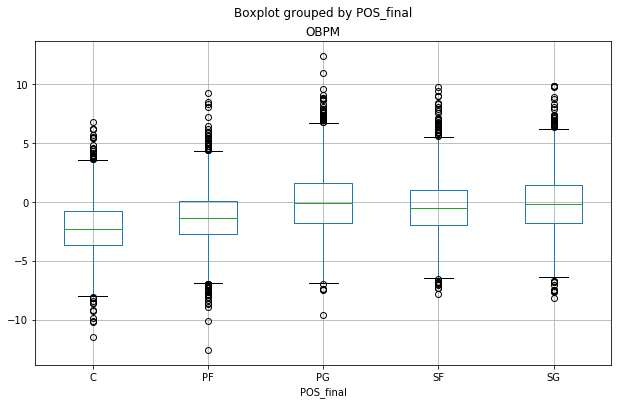

In [93]:
y82_player_stats[(y82_player_stats.Role != 0)].boxplot('OBPM', by='POS_final', figsize=(10, 6))

In [94]:
tukey_DBPM = pairwise_tukeyhsd(endog = y82_player_stats[(y82_player_stats.Role != 0)].DBPM,
                          groups = y82_player_stats[(y82_player_stats.Role != 0)].POS_final,
                          alpha=0.05)

tukey_DBPM.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
C,PF,-0.6823,0.001,-0.7933,-0.5713,True
C,PG,-2.2758,0.001,-2.388,-2.1636,True
C,SF,-1.3012,0.001,-1.4143,-1.188,True
C,SG,-1.9478,0.001,-2.0605,-1.8351,True
PF,PG,-1.5935,0.001,-1.7044,-1.4825,True
PF,SF,-0.6188,0.001,-0.7307,-0.507,True
PF,SG,-1.2655,0.001,-1.3769,-1.154,True
PG,SF,0.9746,0.001,0.8616,1.0877,True
PG,SG,0.328,0.001,0.2154,0.4407,True
SF,SG,-0.6466,0.001,-0.7602,-0.5331,True


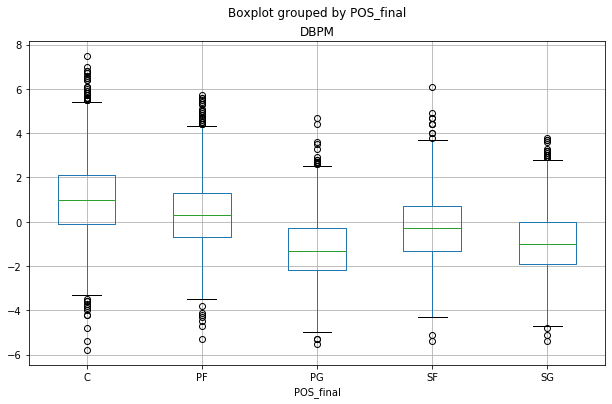

In [97]:
y82_player_stats[(y82_player_stats.Role != 0)].boxplot('DBPM', by='POS_final', figsize=(10, 6))

In [95]:
tukey_OWS = pairwise_tukeyhsd(endog = y82_player_stats[(y82_player_stats.Role != 0)].OWS,
                          groups = y82_player_stats[(y82_player_stats.Role != 0)].POS_final,
                          alpha=0.05)

tukey_OWS.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
C,PF,0.2689,0.001,0.1079,0.43,True
C,PG,0.4372,0.001,0.2743,0.6,True
C,SF,0.3333,0.001,0.1692,0.4974,True
C,SG,0.3789,0.001,0.2154,0.5424,True
PF,PG,0.1682,0.0354,0.0073,0.3292,True
PF,SF,0.0644,0.7909,-0.0979,0.2266,False
PF,SG,0.11,0.3418,-0.0517,0.2717,False
PG,SF,-0.1038,0.419,-0.2678,0.0602,False
PG,SG,-0.0582,0.8537,-0.2217,0.1052,False
SF,SG,0.0456,0.9,-0.1191,0.2103,False


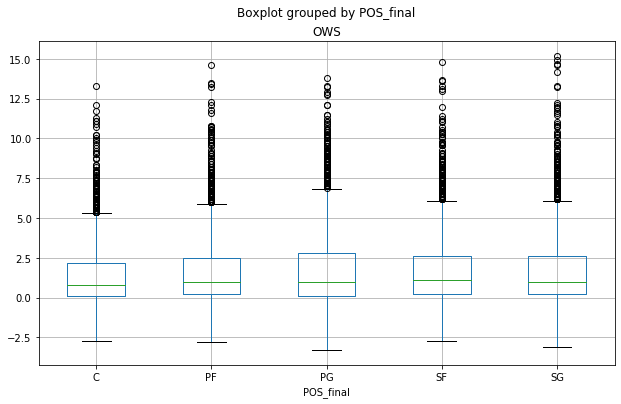

In [98]:
y82_player_stats[(y82_player_stats.Role != 0)].boxplot('OWS', by='POS_final', figsize=(10, 6))

In [96]:
tukey_DWS = pairwise_tukeyhsd(endog = y82_player_stats[(y82_player_stats.Role != 0)].DWS,
                          groups = y82_player_stats[(y82_player_stats.Role != 0)].POS_final,
                          alpha=0.05)

tukey_DWS.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
C,PF,-0.0451,0.613,-0.1331,0.043,False
C,PG,-0.4817,0.001,-0.5707,-0.3927,True
C,SF,-0.298,0.001,-0.3877,-0.2083,True
C,SG,-0.4743,0.001,-0.5637,-0.3849,True
PF,PG,-0.4366,0.001,-0.5246,-0.3487,True
PF,SF,-0.253,0.001,-0.3417,-0.1643,True
PF,SG,-0.4293,0.001,-0.5176,-0.3409,True
PG,SF,0.1837,0.001,0.094,0.2733,True
PG,SG,0.0074,0.9,-0.082,0.0967,False
SF,SG,-0.1763,0.001,-0.2663,-0.0863,True


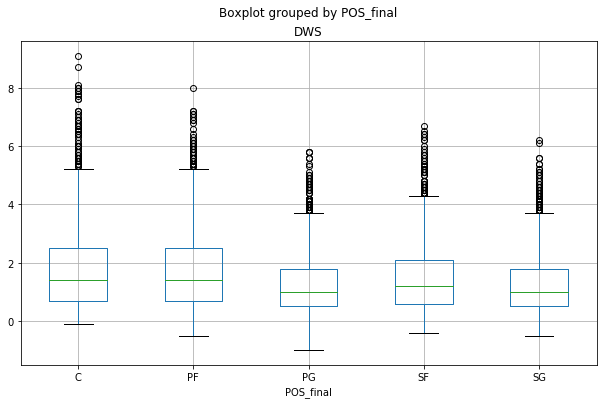

In [99]:
y82_player_stats[(y82_player_stats.Role != 0)].boxplot('DWS', by='POS_final', figsize=(10, 6))